<h2><b><u>Case Study: Heart Disease Dataset</u></b></h2>
<h2> Part 3 of 3: Predictive Modeling  </h2>

<b>Background</b> for this case study can be found in the part 1 Exploratory Data Analysis portion of this case study.
<h3><b><i>Goal</i></b></h3>
<p> With the magnitude of how deadly heart disease is, and how it occurs prematurely with individuals under 70 in many cases, what, if any, are indicators to help pre diagnose individuals who share attributes with those who have experienced CVD? </p>

<p>It is our goal to determine how the above attributes correlate with heart disease, determine if those findings are significant, and create a prediction to evaluate ones's risk of heart disease based on their attributes values using correlation calculations, decision tree classifications, and logistic regression model. </p>

<h3><b> This Assignment: Predictive Modeling</b> </h3>
<p> Because the goal of this 3 step case study is to determine if there are any indicators to help prediagnose individuals with heart disease, there are some predictive measures that must take place. </p>
<p> This will lead to essential findings that could be very valuable to both health care workers as well as health concsious individuals. </p>

<h2> Predictive Method </h2>
<p> Our predictive work will be broken down into 2 sections</p>
<ul> <li> Predictive Measures </li>
    <li> Predictive Interpretation</li> </ul>

<h3> Predictive Measures </h3>
<p> Within our predictive measures, we want to determine if there are variables that can be used to predict if one has a high chance of having heart disease or not. After each of our predictvie measures, we will test whether the model is accurate or not by many checks: confusion matrix, accuracy scores, and classification reports. </p>

<h4><b>Loading the Data and Importing the Packages</b></h4>

In [3]:
#loading in packages for case study
#modeling packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#predictive packages
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import logit

Notice how a lot of these packages are from the <b>sklearn</b> package. Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

In [4]:
#loading in the data using pandas
heart = pd.read_csv("data/heart.csv")

Using the sklearn package, we will use two methods. <b> Decision Tree Diagram</b> as well as <b> Binary Linear Regressions</b>

<h2> Decision Tree Diagram</h2>
<h4>Feature Selection </h4>
We divide the given columns into two types of variables: target variables or dependent and feature variables that are independent.

<p> It is important to convert our Sex and other variables that are not numerical values to numerical values for the decision tree to be the most accurate for our data. Here, we utilize the <b>np.where</b> function to change the mens value to be true (1)and the value of women to be false (0). </p>

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart['Sex'].astype(object)

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object

In [7]:
#changing the sex variable to change from object to a numeric value. Changing M to be 1 as there are more men in the sample than women
heart['Sex'] = np.where(heart['Sex'] == 'M', 1, 0)

In [8]:
#checking to make sure that the change was correctly made for the sex variable
heart['Sex']

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64

Check to make sure that the change was made in the dataset by using the <b>info</b> function (same as first code chunk):

Now that we know that Sex is no longer an object, it can be used in the different predictive measures

In [9]:
#split dataset in features and target variable
feature_cols = ['Sex','MaxHR','Age','RestingBP', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

<h5> Splitting the Data </h5>
<p> To understand the model performance, dividing the dataset into training set and a test set is a good strategy</p>
<p> To do so, use the function train_test_splot() from the sklearn package. For this function to work, you need to pass 3 parameters: features, target and test_set size </p>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

<h4> Building the Decision Tree Model </h4>
<p> using sklearn package, create the decision tree model </p>

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<h5> Evaluating Model </h5>
<p>lets estimate, how accurately the classifier or model can predict the type of cultivar. Here, we are computing accuracy by comparing actual test set values and predicted values </p>

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6920289855072463


<p> An accuracy of high 60-70 is considered a good accuracy. This accuracy will be improved tuning the parameters in the decision tree </p>

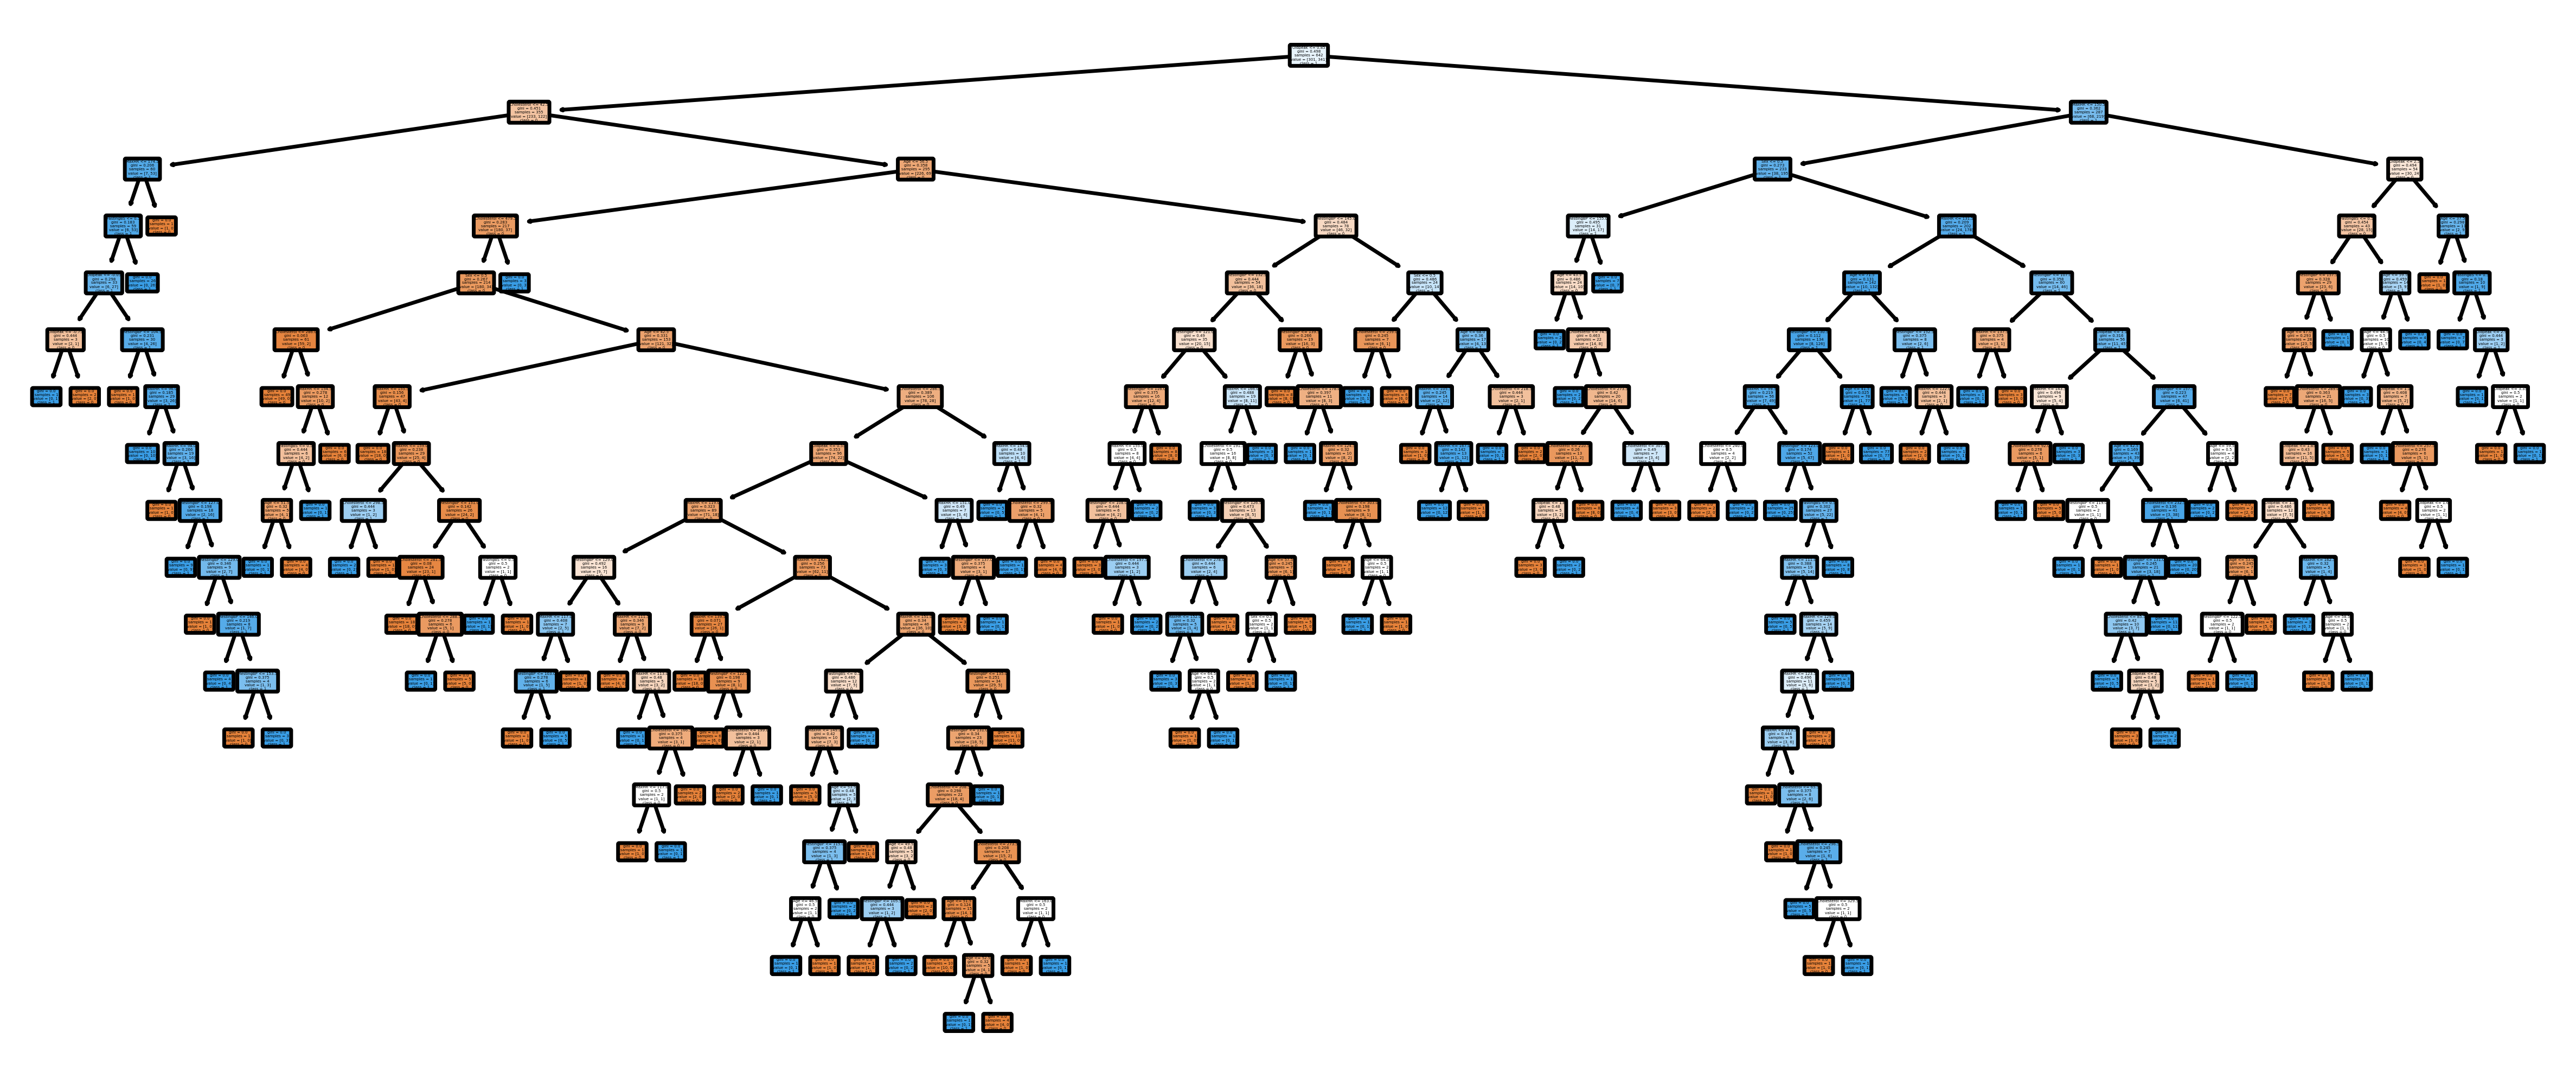

In [56]:
plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);

<p>Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.</p>
<h4> Optimizing Decision Tree Performance </h4>

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8007246376811594


<p> This accuracy has now been increased by 10% so now it is at an accuracy classification rate of 80.1%. By creating the max depth within our decision tree classifier, it creates a more specific view point instead of having sp many potential outcomes. It allows for more accuracy because of a smaller scope to look at.</p>

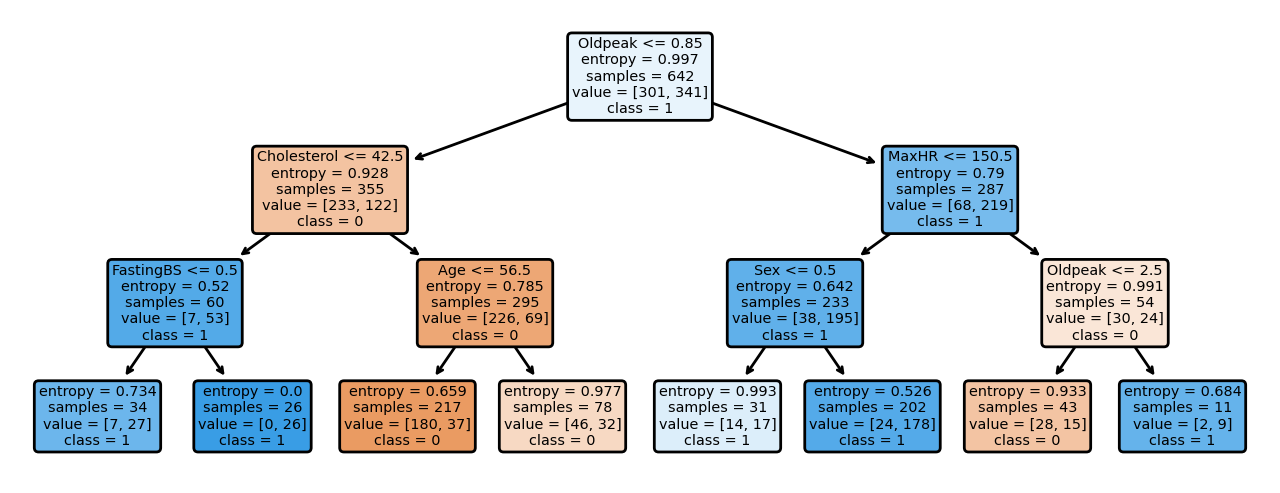

In [13]:
#plotting the new tree with greater accuracy
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);

<h4> Here is how to read the model</h4>
<h5> <b> Must Read</b></h5>
<p>The top of the decision tree model is the called the root node. From the root node (the top light blue box), the first value in the top line (in this case oldpeak) is the decision factor, and from that, if the case is true, it follows the left arrow, and if it is false, it follows the right arrow. So using the first node, if the persons oldpeak value is less than or equal to 0.85, follow the left true arrow to the orange cholesterol node. If the persons oldpeak value is greater than 0.85, then continue using the right arrow leading to the dark blue MaxHR node. </p>

<p> The following terminology is important to understand the findings of the model. The top of the tree (the light blue square on the top) is called the <b>root node</b>. Intermediate <b>nodes</b> have arrows pointing to and away from them. The left arrow shows if the top variable is true, and the right arrow shows if the top variable value is false. And lastly, the final row contains the <b>leaves</b>. Leaves tell you what class each sample belongs to.</p>

<p> Within the individual boxes, there are values that help determine how likely each case is. 
 <b>Entropy</b> measures the impurity of the input set. Informatio gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.
<b> Samples</b> shows the amount from the dataset that fits that criterion</p>

<p> Finally, the bottom eight boxes, the <b> leaves</b> have the final likelihoods. So for example, to get to the bottom light blue box, the individual would have to have an oldpeak value of more than 0.85, have a max heart rate of less than or equal to 150.5, and have a sex less than 0.5 (so the individual is a woman). </p>


<h3> Question 1: </h3>
Describe the features of an individual that falls into the dark orange leave?

<b> Answer</b>: 

<h3> Question 2:</h3>
Using the samples in the individual leaves, sort the leaves in the probability of them occuring? 
In your analysis, label the leaves 1-8, starting from the left most leaf being 1 and the most right leaf being 8

<b> Answer</b>: 

<h3>Question 3:</h3>
Describe the variable values of an individual with the two most common leaves

<b>Answer</b>:

<h3> Question 4:</h3>
How could this be applied in the real world? 

<b>Answer</b>: 

<h3> Question 5:</h3>
Why was it important for us to switch the Sex variable from an object to numerical values?

<b>Answer</b>: 

<h3> Question 6:</h3>
Why is it important for us to do the optimizing step for creating a decision tree?

<b>Answer</b>:

<h4> Evaluating Decision Tree by Confusion Matrix</h4>
<p> A <b>confusion matrix</b> is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct (true positive and true negatives) and incorrect predictions (false positives and false negatives) are summed up class-wise</p>

Text(0.5, 257.44, 'Predicted label')

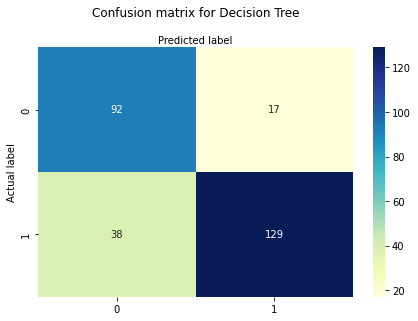

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#visualizing the confusion matrix through a heatmap

#import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

#labeling heat map 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p>The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, <b>92</b> and <b>129</b> are actual predictions, and <b>17</b>  and <b>38</b> are incorrect predictions. So, the decision tree was an overall good model to show personality predictions of patients. </p>

In [15]:
#evaluating the model using model evaluation metrics such as accuracy, precision, and recall.
#accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#precision score
print("Precision:",metrics.precision_score(y_test, y_pred))

#recall score
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8007246376811594
Precision: 0.8835616438356164
Recall: 0.7724550898203593


<p>classification rate of 80%, considered as a good accuracy. </p>
<p> Percision, how accurate is the model. In our prediction case, when your Logistic Regression model predicted patients are going to suffer from heart disease, that patients prediction will be correct 88% of the time.</p>
<p> Recall, If there are patients who have heart disease in the test set and your Logistic Regression model can identify it 77% of the time.</p>

<h2>Binary Linear Regression</h2>
<h5> Assumptions Required for Successful Linear Regression</h5>
<p> Binary logisitc regression requires the dependent variable to be binary. In this dataset, the dependent variable is Heart Disease with the binary 0 or 1. Within a binary logistic regression, all of the variables are tested at once to assess their predictive ability.  </p>
<p> to have a successful regression, only meaningful variables should be included. For this dataset, I will take the following to be meaningful variables
    <ul>
        <li>Sex</li>
        <li>Age</li>
        <li>RestingBP</li>
        <li>Old Peak</li>
        <li>Heart Disease</li></ul>
The variables should be independent of each other, here, the variables are. 
Logistic Regressions require large sample sizes. This dataset has 900+ observarions and so is large enough for such regression.</p>

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

train_data, test_data = train_test_split(heart, test_size = 0.2, random_state= 42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


/Users/abbywillard/opt/miniconda3/envs/geoenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#split dataset in features and target variable
feature_cols = ['Sex','MaxHR','Age','RestingBP', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('HeartDisease ~ Sex+ MaxHR + Age + RestingBP + Oldpeak + Cholesterol + FastingBS')
model1 = logit(formula=formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.455936
         Iterations 6


In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  734
Model:                          Logit   Df Residuals:                      726
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Feb 2022   Pseudo R-squ.:                  0.3381
Time:                        19:18:12   Log-Likelihood:                -334.66
converged:                       True   LL-Null:                       -505.62
Covariance Type:            nonrobust   LLR p-value:                 6.618e-70
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6826      1.171      1.437      0.151      -0.612       3.977
Sex             1.1630      0.242      4.798      0.000       0.688       1.638
MaxHR          -0.0276      0.004     -6.208      0.000      -0.036      -0.019
Age             0.0108      0.012      0.918      0.359      -0.012       0.034
RestingBP       0.0039      0.005      0.719      0.472      -0.007       0.015
Oldpeak         1.0111      0.113      8.910      0.000       0.789       1.233
Cholesterol    -0.0037      0.001     -3.650      0.000      -0.006      -0.002
FastingBS       1.0630      0.252      4.224      0.000       0.570       1.556
===============================================================================
"""

There are two variables that produced a P value greater than 0.05, <b> Age and RestingBS</b>. Therefore, we will remove those and continue on

In [20]:
#odds ratio table 
print(np.exp(model1.params))

Intercept      5.379415
Sex            3.199555
MaxHR          0.972755
Age            1.010875
RestingBP      1.003937
Oldpeak        2.748540
Cholesterol    0.996317
FastingBS      2.895169
dtype: float64


<p>Mathematically, one can compute the odds ratio by taking exponent of the estimated coefficients. For example, in the above ODDS ratio table, you can observe that FastingBS has an ODDS Ratio of <b>2.89</b>, which indicates that one unit increase in Fasting Blood sugar label increases the odds of having heart disease by <b>2.89</b> times. This is an interesting find because the Fasting BS is a boolean, where 1: >120mg/dL, and 0: anything below. Therefore, moving from under 120mg/dL to above that threshold indicates that that person has increased their odds of having heart disease by 2.89 times. The two largest odds is the Sex and FastingBS</p>

<h3> Question 7:</h3>
What does an odds ratio of less than or equal to 1 indicate?

<b>Answer</b>: 

<h3> Question 8:</h3>
Describe what the 3.199 odds for Sex indicates

<b>Answer</b>:

Text(0.5, 257.44, 'Predicted label')

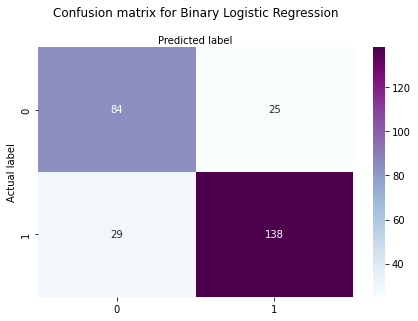

In [95]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#visualizing the confusion matrix through a heatmap

#import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

#labeling heat map 
plt.title('Confusion matrix for Binary Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Question 9:</h3>
What is the interpretation of this confusion matrix?

<b>Answer</b>: 

<h3>Question 10:</h3>
Why is it important to test the models with the confusion matrix and other evaluation models?

<b>Answer</b>: 

<h1>Conclusion</h1>
<p> All of the steps used within the Heart Disease case study were necessary to gain insight on the variablbes, test if the insight was valid, then create predictive measures to explore the variables further.</p>
<p> As shown by the chest pain pairplot within our experimental analysis, one can't necessarily assume that chest pain ensures that they have a heart disease, as the majority of heart disease positive patients have asymptomatic pains. Because of that, it is integral that there should be public publications of predictive and exploratory findings so that patients can help self monitor their attribute values and check with the findings published. By analysing the experimental results, it is concluded that being older in age, being male, having an old peak of one, and a low heart rate all are physiological traits to heart disease positive individuals. This makes sense as older individuals tend to have health issues. Having a low heart rate also makes sense as maximum heart rate decreases as one gets older, as with the age variable. </p>

<p> With our prediction results, the tree technique turned out to be best classifier for heart disease prediction because it contains more accuracy and least total time to build. The tree has easy and clear to interpret and visualize. The second decision tree is a pruned model which was less complex, more explainable, and easy to understand for non-data minded people. The binary regression helps show the weight of each variable, and indicates that if the variables such as fasting blood sugar increases by one unit (blood sugar level reaches 120 mg/L), it increases the liklihood of having a heart disease by respective odds ratio (for fasting BS, 3.16%). Therefore, one can interpret, based on their own attribute values, their personal likleihood of obtaining heart disease. These skills that were put to test in this case study can be replicated for many other non-health related case studies in which predicting measures are need.</p>
